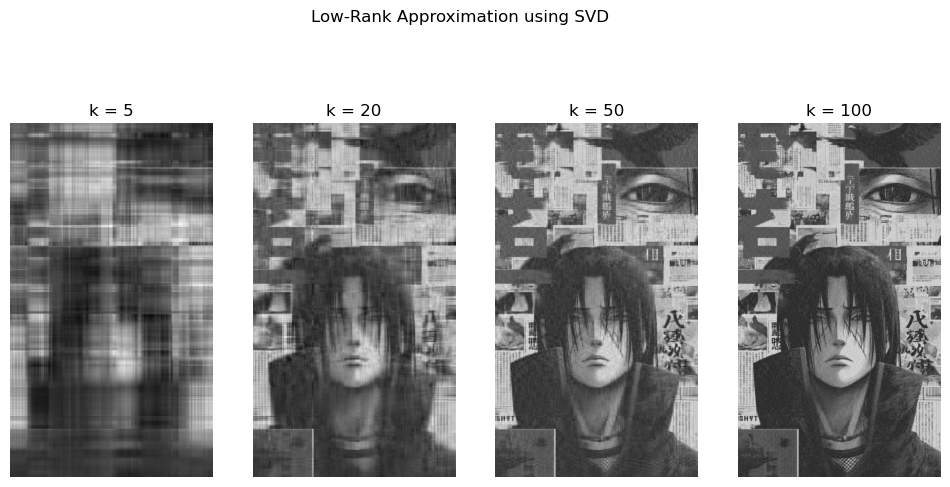

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io

# Step 1: Load an image and convert to grayscale
image = io.imread('download.jpeg')
gray = color.rgb2gray(image)

# Step 2: Perform SVD
U, S, Vt = np.linalg.svd(gray, full_matrices=False)

# Step 3: Function for low-rank approximation
def low_rank_approximation(U, S, Vt, k):
    """Reconstruct matrix using only top k singular values"""
    # Create a diagonal matrix of top k singular values
    S_k = np.zeros((k, k))
    np.fill_diagonal(S_k, S[:k])

    # Reconstruct using top k singular values and vectors
    A_k = U[:, :k] @ S_k @ Vt[:k, :]
    return A_k

# Step 4: Visualize approximation with different ranks
ranks = [5, 20, 50, 100]
plt.figure(figsize=(12, 6))

for i, k in enumerate(ranks):
    A_k = low_rank_approximation(U, S, Vt, k)
    plt.subplot(1, len(ranks), i + 1)
    plt.imshow(A_k, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

plt.suptitle('Low-Rank Approximation using SVD')
plt.show()
